<h2 align = "right">学院：计算机学院&emsp;学号：3120191079&emsp;姓名：周泳宇</h2>

# Wine Reviews数据集

## 一、数据可视化和摘要

In [87]:
import seaborn as sns
import numpy as np
from fancyimpute import KNN
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor

#显示所有列
pd.set_option('display.max_columns', None)
#显示所有行
pd.set_option('display.max_rows', None)
#设置value的显示长度为100，默认为50
pd.set_option('max_colwidth',200)

In [71]:
wine_df = pd.read_csv('winemag-data-130k-v2.csv')

In [67]:
def fiveNumber(nums):
    # 五数概括 Minimum（最小值）、Q1、Median（中位数、）、Q3、Maximum（最大值）
    Minimum = min(nums)
    Maximum = max(nums)
    Q1 = np.percentile(nums, 25)
    Median = np.median(nums)
    Q3 = np.percentile(nums, 75)

    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR  # 下限值
    upper_limit = Q3 + 1.5 * IQR  # 上限值

    return Minimum, Q1, Median, Q3, Maximum, lower_limit, upper_limit

### 1.1 数据摘要

#### 标称属性：以province、country为例（频数描述）

In [73]:
province = wine_df['province']
value_count = province.value_counts()
print(value_count)

California                         36247
Washington                          8639
Bordeaux                            5941
Tuscany                             5897
Oregon                              5373
Burgundy                            3980
Northern Spain                      3851
Piedmont                            3729
Mendoza Province                    3264
Veneto                              2716
New York                            2688
Alsace                              2440
Northeastern Italy                  2138
Loire Valley                        1856
Sicily & Sardinia                   1797
Champagne                           1613
Southwest France                    1503
Southern Italy                      1349
South Australia                     1349
Provence                            1346
Douro                               1281
Central Italy                       1233
Catalonia                           1164
Rhône Valley                        1081
Beaujolais      

In [74]:
country = wine_df['country']
value_count = country.value_counts()
print(value_count)

US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Czech Re

#### 数值型属性：price, points（统计缺失值+五数概括）

In [13]:
# 统计缺失值
# price = wine_df['price']
# na_count = price.shape[0] - price.count()
# print(na_count)

wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


#### 可以看到，数据总数为129971条，在数值型数据中，points没有缺失值，price缺失了8996条数据，数据缺失原因：数据库进行数据写入时数据丢失，或者价格本身就是缺失数据，没有被统计到。

In [11]:
# 五数概括
wine_df.describe()

,Unnamed: 0,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,41.022218
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,17.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


### 1.2 数据可视化（以属性price和points为例）

#### 直方图（数据分布）

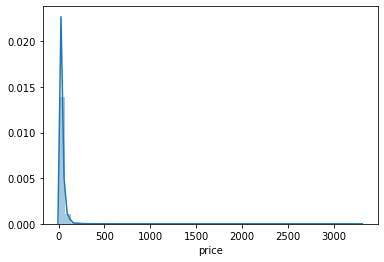

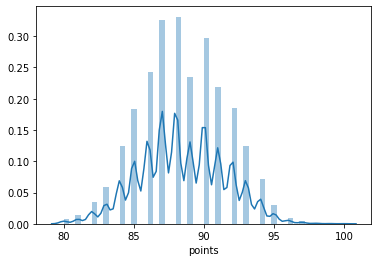

In [17]:
sns.distplot(wine_df['price'])
plt.show()
sns.distplot(wine_df['points'])
plt.show()

#### 盒图（离群点）

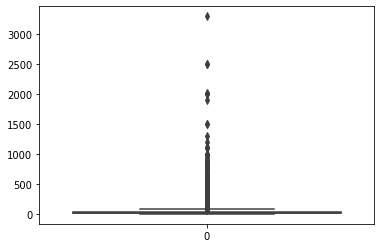

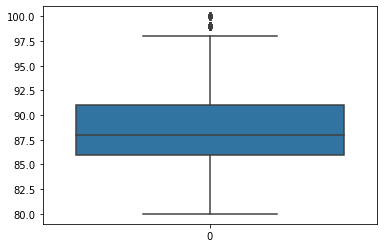

In [26]:
sns.boxplot(data=wine_df['price'])
plt.show()
sns.boxplot(data=wine_df['points'])
plt.show()

## 二、数据缺失值的处理（因只有price有缺失值，这里只处理price，对于标称型数据，以country为例，通过用最高频率值的方式来进行填充）

In [82]:
#显示所有列
pd.set_option('display.max_columns', 100)
#显示所有行
pd.set_option('display.max_rows', 1000)
#设置value的显示长度为100，默认为50
pd.set_option('max_colwidth',1000)

### 2.1 将缺失部分剔除

#### 处理之前的数据集

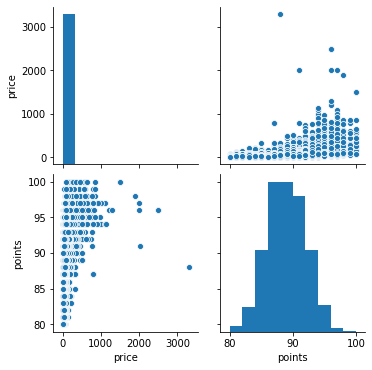

0          NaN
1         15.0
2         14.0
3         13.0
4         65.0
          ... 
129966    28.0
129967    75.0
129968    30.0
129969    32.0
129970    21.0
Name: price, Length: 129971, dtype: float64


In [83]:
sns.pairplot(wine_df, vars=["price","points"])
plt.show()
print(wine_df['price'])

#### 处理之后的数据集

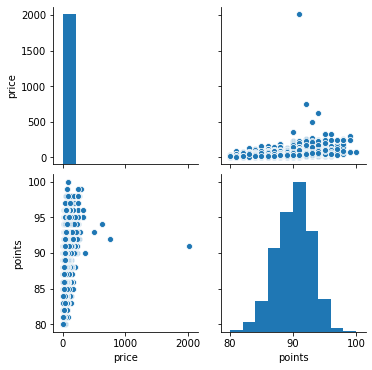

4          65.0
10         19.0
23         22.0
25         69.0
35         50.0
          ...  
129919    105.0
129926     41.0
129945     20.0
129949     35.0
129950     35.0
Name: price, Length: 22387, dtype: float64


In [46]:
wine_df_after = wine_df.dropna()
sns.pairplot(wine_df_after, vars=["price","points"])
plt.show()
print(wine_df_after['price'])

### 2.2 用最高频率值来填补缺失值

#### 处理之前的数据集

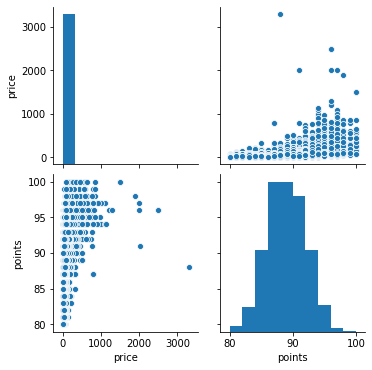

0          NaN
1         15.0
2         14.0
3         13.0
4         65.0
          ... 
129966    28.0
129967    75.0
129968    30.0
129969    32.0
129970    21.0
Name: price, Length: 129971, dtype: float64


0            Italy
1         Portugal
2               US
3               US
4               US
            ...   
129966     Germany
129967          US
129968      France
129969      France
129970      France
Name: country, Length: 129971, dtype: object


In [85]:
wine_df2 = wine_df.copy(deep=True)
sns.pairplot(wine_df2, vars=["price","points"])
plt.show()
print(wine_df2['price'])
print("\n===================\n")
print(wine_df2['country'])

#### 处理之后的数据集

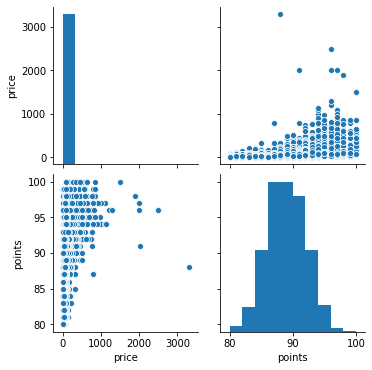

0         20.0
1         15.0
2         14.0
3         13.0
4         65.0
          ... 
129966    28.0
129967    75.0
129968    30.0
129969    32.0
129970    21.0
Name: price, Length: 129971, dtype: float64


0            Italy
1         Portugal
2               US
3               US
4               US
            ...   
129966     Germany
129967          US
129968      France
129969      France
129970      France
Name: country, Length: 129971, dtype: object


In [86]:
mode = wine_df2['price'].mode().iloc[0]
wine_df2['price'] = wine_df2['price'].fillna(mode)

mode = wine_df2['country'].mode().iloc[0]
wine_df2['country'] = wine_df2['country'].fillna(mode)

sns.pairplot(wine_df2, vars=["price","points"])
plt.show()
print(wine_df2['price'])
print("\n===================\n")
print(wine_df2['country'])

### 2.3 通过属性的相关关系来填补缺失值

#### 处理之前的数据集

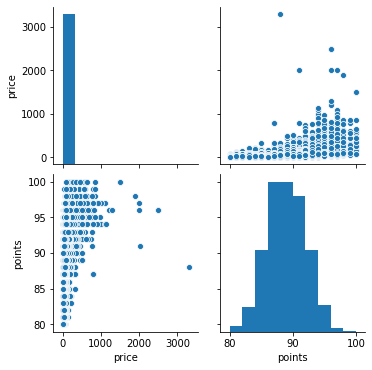

0          NaN
1         15.0
2         14.0
3         13.0
4         65.0
          ... 
129966    28.0
129967    75.0
129968    30.0
129969    32.0
129970    21.0
Name: price, Length: 129971, dtype: float64


In [47]:
wine_df3 = wine_df.copy(deep=True)
sns.pairplot(wine_df3, vars=["price","points"])
plt.show()
print(wine_df3['price'])

#### 处理之后的数据集

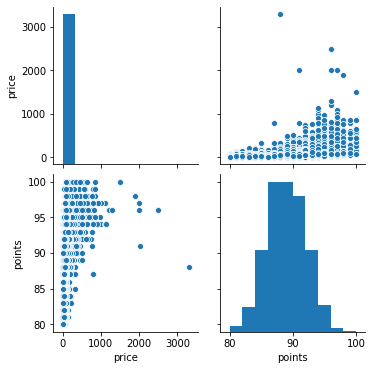

0         24.903054
1         15.000000
2         14.000000
3         13.000000
4         65.000000
            ...    
129966    28.000000
129967    75.000000
129968    30.000000
129969    32.000000
129970    21.000000
Name: price, Length: 129971, dtype: float64


In [48]:
def set_missing_ages(df):
    # 把数值型特征都放到随机森林里面去
    age_df = df[['price', 'points']]
    known_age = age_df[age_df.price.notnull()].iloc[:,:].values
    unknown_age = age_df[age_df.price.isnull()].iloc[:,:].values
    y = known_age[:, 0]  # y是price，第一列数据
    x = known_age[:, 1:]  # x是特征属性值，后面几列
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    # 根据已有数据去拟合随机森林模型
    rfr.fit(x, y)
    # 预测缺失值
    predictedAges = rfr.predict(unknown_age[:, 1:])
    # 填补缺失值
    df.loc[(df.price.isnull()), 'price'] = predictedAges

    return df

wine_df3 = set_missing_ages(wine_df3)

sns.pairplot(wine_df3, vars=["price","points"])
plt.show()
print(wine_df3['price'])

### 2.4 通过数据对象之间的相似性来填补缺失值（用KNN来衡量对象之间的相似性）

#### 处理之前的数据集

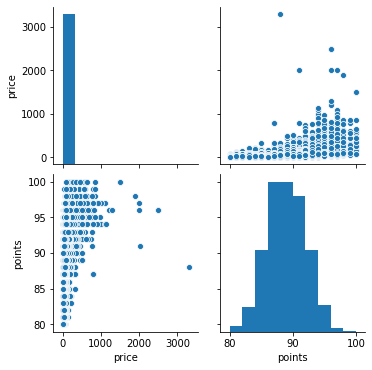

0          NaN
1         15.0
2         14.0
3         13.0
4         65.0
          ... 
129966    28.0
129967    75.0
129968    30.0
129969    32.0
129970    21.0
Name: price, Length: 129971, dtype: float64


In [49]:
wine_df4 = wine_df.copy(deep=True)
sns.pairplot(wine_df4, vars=["price","points"])
plt.show()
print(wine_df4['price'])

#### 处理之后的数据集（因计算资源原因，只处理局部数据）

In [52]:
new_data = wine_df4[['price', 'points']][:50]
fill_knn = KNN(k=3).fit_transform(new_data)
print(fill_knn)

Imputing row 1/50 with 1 missing, elapsed time: 0.004
[[20.66666667 87.        ]
 [15.         87.        ]
 [14.         87.        ]
 [13.         87.        ]
 [65.         87.        ]
 [15.         87.        ]
 [16.         87.        ]
 [24.         87.        ]
 [12.         87.        ]
 [27.         87.        ]
 [19.         87.        ]
 [30.         87.        ]
 [34.         87.        ]
 [13.33333333 87.        ]
 [12.         87.        ]
 [24.         87.        ]
 [30.         87.        ]
 [13.         87.        ]
 [28.         87.        ]
 [32.         87.        ]
 [23.         87.        ]
 [20.         87.        ]
 [19.         87.        ]
 [22.         87.        ]
 [35.         87.        ]
 [69.         87.        ]
 [13.         87.        ]
 [10.         87.        ]
 [17.         87.        ]
 [16.         86.        ]
 [26.66666667 86.        ]
 [26.66666667 86.        ]
 [26.66666667 86.        ]
 [50.         86.        ]
 [20.         86.        ]
 